# <center>Data Mining Project Code</center>

** **
## <center>*03 - XXXX*</center>

** **

In this notebook, we start our customer segmentation using two different partitioning methods: K-means and K-medoids. Each algorithm is going to be applied to different datasets which suffered from different transformations.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# ToC

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

1. [Clustering](#2.-Clustering) <br><br>


In [90]:
import pandas as pd
import numpy as np
from IPython.display import display 

# Scalers
from sklearn.preprocessing import RobustScaler

# Clustering algorithms
from sklearn.cluster import KMeans

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

path = './plots/temporal_data/'

# 1. Importing Libraries & Data

In [2]:
data = pd.read_csv('data/preprocessed_data.csv', 
                   index_col = "customer_id")
temp_data = data[s.temporal_data]
temp_data

,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0
5d272b9dcb,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0
f6d1b2ba63,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0
180c632ed8,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0
4eb37a6705,0,2,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
f6b6709018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
f74ad8ce3f,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [3]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
first_order,31828.0,28.367538,24.116981,0.0,7.0,22.0,45.0,90.0
last_order,31828.0,63.666740,23.231670,0.0,49.0,70.0,83.0,90.0
days_between,31828.0,35.299202,29.437903,0.0,3.0,34.0,62.0,90.0
HR_0,31828.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HR_1,31828.0,0.053726,0.316398,0.0,0.0,0.0,0.0,14.0
HR_2,31828.0,0.063183,0.351663,0.0,0.0,0.0,0.0,12.0
HR_3,31828.0,0.118386,0.497201,0.0,0.0,0.0,0.0,11.0
HR_4,31828.0,0.101609,0.437411,0.0,0.0,0.0,0.0,14.0
HR_5,31828.0,0.081846,0.358645,0.0,0.0,0.0,0.0,7.0
HR_6,31828.0,0.069718,0.329540,0.0,0.0,0.0,0.0,8.0


# 2. Clustering

**Scale Data Before Clustering**

In [4]:
scaled_data = RobustScaler().fit_transform(temp_data)

In [5]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns=temp_data.columns, 
                           index=temp_data.index)

## 2.1 Hierarchical Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [6]:
linkages = ['ward', 'complete', 'average', 'single']

**Dendrogram**

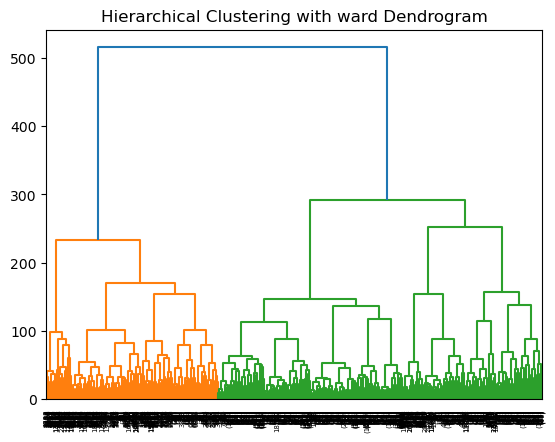

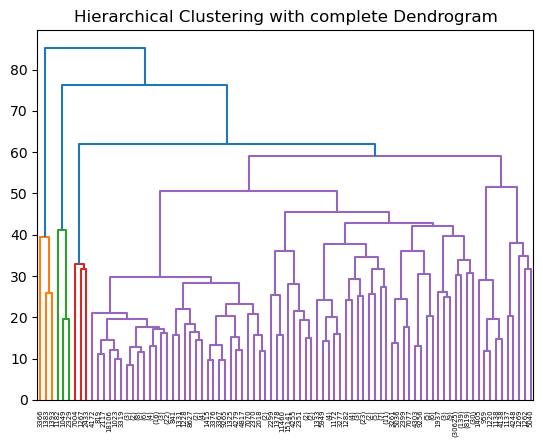

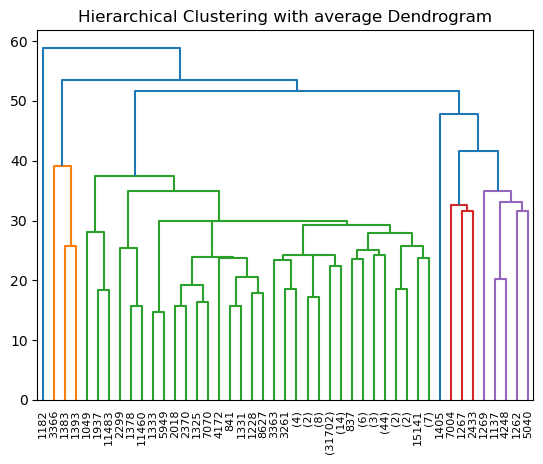

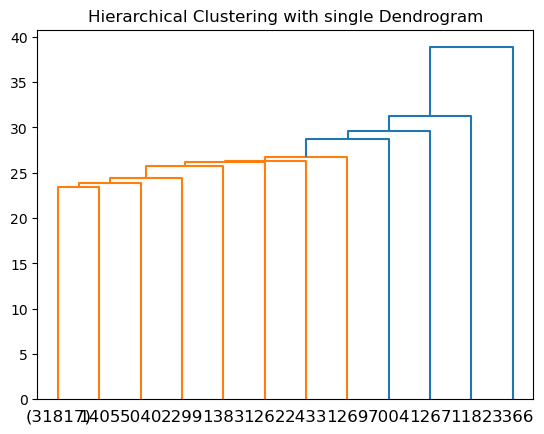

In [7]:
for linkage in linkages:
    agg_clust = AgglomerativeClustering(
        linkage = linkage, distance_threshold = 0, n_clusters=None
        ).fit(scaled_data)
    
    fig, ax = plt.subplots()
    plt.title(f"Hierarchical Clustering with {linkage} Dendrogram")
    f.plot_dendrogram(agg_clust, truncate_mode="level", p=10)
    plt.show()

**R2**

In [ ]:
max_nclus = 8

r2_hc = np.vstack([ f.get_r2_hc(temp_data, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in linkages])

In [43]:
r2_hc_methods = pd.DataFrame(r2_hc.T, 
                             index=range(1, max_nclus + 1), 
                             columns=linkages)

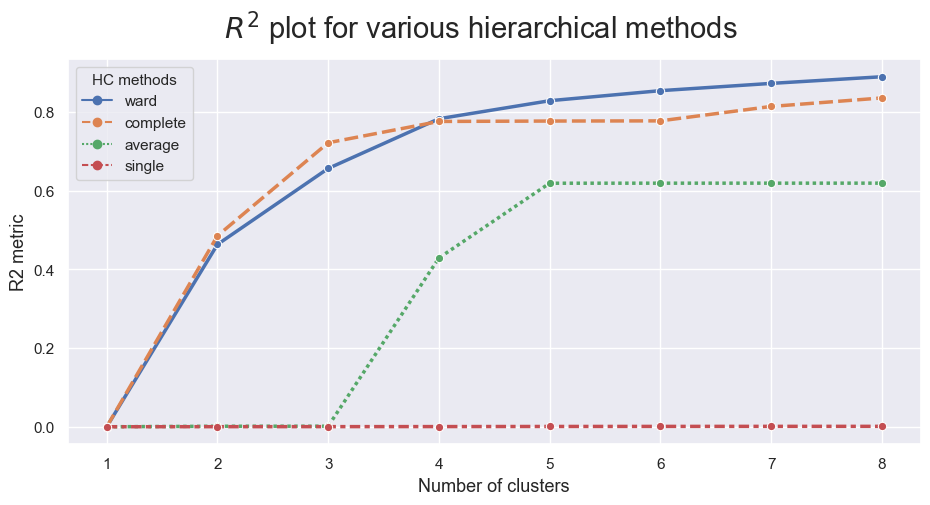

In [45]:
sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

**Final Solution for Hierarchical Clustering**

In [46]:
# linkage = None
# distance = None
# n_clusters = None

# hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)

# hc_labels = hclust.fit_predict(temp_data)

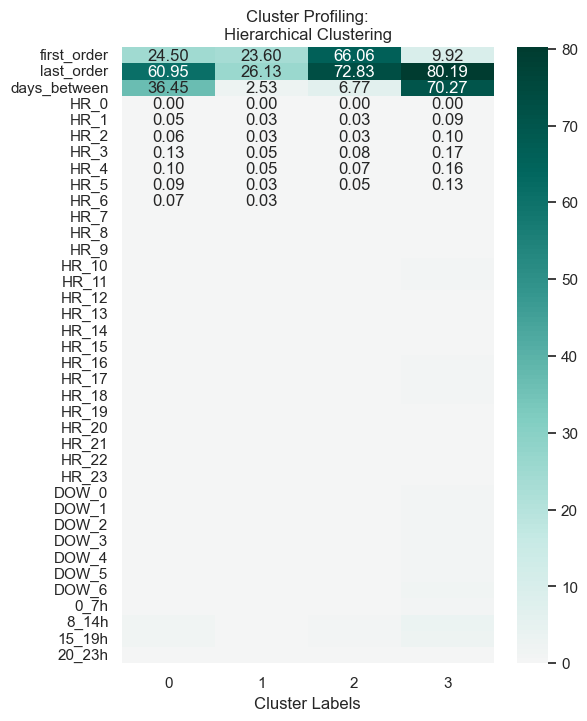

In [49]:
f.plot_cluster_profiling(temp_data, hc_labels, "Hierarchical")

## 2.2 K-Means

In [9]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

**Elbow Method**

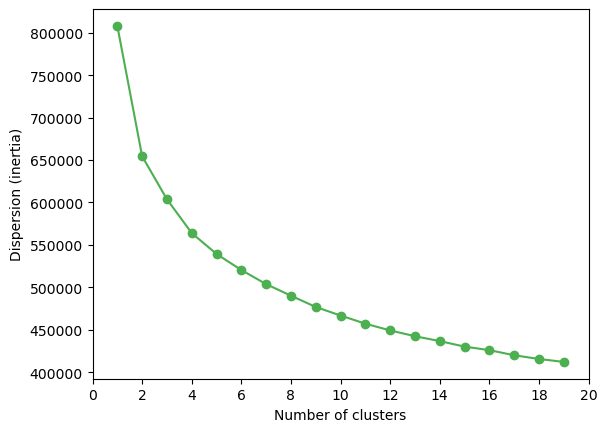

In [10]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

**Histogram**

In [16]:
possible_k = [2, 3, 4, 5, 6, 7, 8]

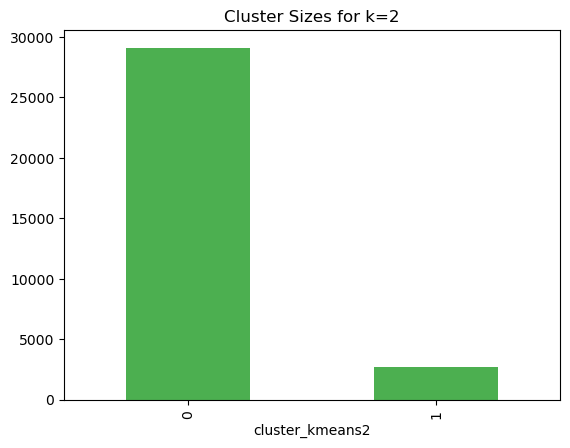


Mean values for k=2:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30.288306,61.879140,31.590834,0.0,0.047341,0.056033,0.114058,0.094648,0.077367,0.062285,0.061873,0.092930,0.165350,0.227979,0.259619,0.213721,0.167033,0.155181,0.203071,0.261062,0.276350,0.229902,0.162292,0.097327,0.052563,0.035695,0.035385,0.394977,0.399684,0.419335,0.442559,0.504741,0.500344,0.529648,0.513605,1.281813,1.132678,0.220970
1,7.812500,82.796691,74.984191,0.0,0.122059,0.139706,0.164706,0.176103,0.129779,0.149265,0.236029,0.549265,0.971691,1.417279,1.648529,1.390074,0.977941,0.859926,1.067647,1.375735,1.619118,1.484559,1.140074,0.629412,0.270956,0.182353,0.150368,2.277941,2.366544,2.425735,2.510662,2.531618,2.286029,2.572794,1.117647,7.814706,6.687132,1.233088


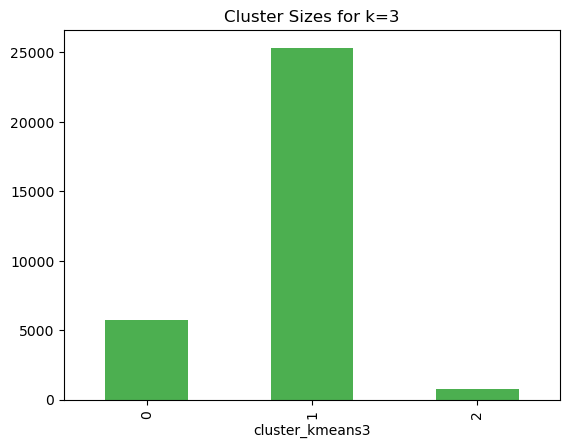


Mean values for k=3:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11.867501,79.304643,67.437141,0.0,0.111807,0.120153,0.199444,0.185359,0.144497,0.129369,0.155103,0.270562,0.504260,0.742132,0.843679,0.716397,0.533125,0.472092,0.612589,0.798644,0.882455,0.759868,0.564597,0.325856,0.154582,0.105721,0.101026,1.220483,1.284472,1.327421,1.402017,1.451052,1.351243,1.498870,1.045731,4.082247,3.618153,0.687185
1,32.812266,59.486917,26.674652,0.0,0.038873,0.048423,0.099609,0.081495,0.066380,0.052330,0.050554,0.073484,0.133036,0.177197,0.200284,0.162990,0.129682,0.124630,0.159833,0.203520,0.214018,0.179881,0.126958,0.076404,0.042109,0.029796,0.027981,0.310786,0.309128,0.327558,0.342989,0.407790,0.408461,0.427128,0.437665,1.001302,0.884210,0.176290
2,4.338753,85.318428,80.979675,0.0,0.111111,0.126016,0.131436,0.139566,0.124661,0.201897,0.365854,1.058266,1.605691,2.348238,2.864499,2.373984,1.585366,1.331978,1.682927,2.155827,2.642276,2.441734,1.844173,0.995935,0.421409,0.233062,0.201897,3.792683,3.863144,3.888889,4.006775,3.929539,3.605691,4.027100,1.200542,13.168022,10.766938,1.852304


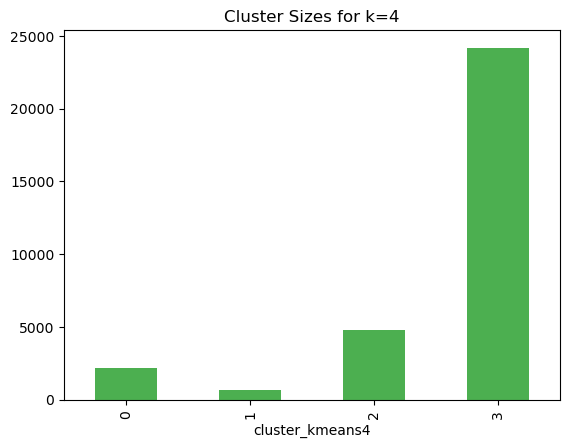


Mean values for k=4:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.955066,76.114626,58.159560,0.0,0.385603,0.520862,1.027969,0.847318,0.657497,0.492893,0.444292,0.328748,0.405319,0.525906,0.381018,0.249427,0.188446,0.158184,0.104081,0.071068,0.051353,0.031178,0.020174,0.021091,0.022008,0.050436,0.091701,1.028886,1.065108,1.074278,1.076570,0.997249,1.021550,0.996332,4.376433,2.237047,0.277854,0.185236
1,4.314112,85.382398,81.068285,0.0,0.104704,0.077390,0.091047,0.068285,0.088012,0.162367,0.350531,1.094082,1.655539,2.474962,3.044006,2.518968,1.670713,1.409712,1.776935,2.207891,2.682853,2.477997,1.887709,1.040971,0.430956,0.242792,0.218513,3.883156,3.987860,4.050076,4.101669,4.059181,3.690440,4.128983,0.942337,13.867982,11.033384,1.933232
2,11.766361,79.162985,67.396624,0.0,0.030429,0.021676,0.015423,0.016257,0.019383,0.026886,0.063151,0.207795,0.458941,0.692789,0.867028,0.759900,0.568987,0.512714,0.709879,0.974573,1.107545,0.951230,0.700083,0.390163,0.178199,0.108587,0.085869,1.203001,1.250313,1.298041,1.404544,1.479366,1.351605,1.538558,0.193206,4.068153,4.443310,0.762818
3,33.254403,58.879206,25.624804,0.0,0.027036,0.029764,0.057544,0.052212,0.042166,0.037536,0.038859,0.072923,0.135552,0.181439,0.208516,0.171641,0.135593,0.129062,0.165812,0.208971,0.217197,0.184580,0.131377,0.080240,0.044647,0.030757,0.028235,0.294254,0.294378,0.312691,0.327449,0.398098,0.398388,0.419140,0.285118,1.034725,0.907937,0.183878


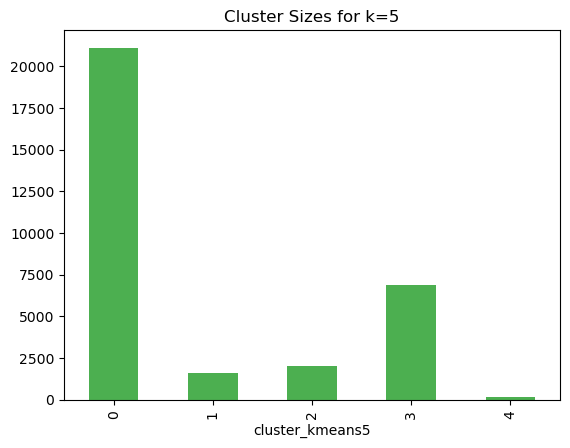


Mean values for k=5:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35.457609,56.707834,21.250225,0.0,0.028260,0.033420,0.064426,0.058367,0.046817,0.039905,0.040521,0.067077,0.120521,0.161799,0.183101,0.144994,0.114272,0.109586,0.133018,0.159290,0.167006,0.141917,0.103148,0.064947,0.035976,0.026462,0.025183,0.255905,0.255763,0.265136,0.279811,0.340970,0.345846,0.358249,0.311716,0.901349,0.704379,0.152568
1,7.083175,83.076190,75.993016,0.0,0.057778,0.040000,0.036825,0.042540,0.054603,0.079365,0.153651,0.462222,0.937778,1.379683,1.680000,1.519365,1.044444,0.926984,1.166984,1.507302,1.793016,1.689524,1.238095,0.632381,0.273016,0.158730,0.117460,2.273016,2.360635,2.438730,2.560000,2.557460,2.269841,2.618413,0.464762,7.950476,7.394921,1.181587
2,18.096380,76.332192,58.235812,0.0,0.393836,0.539139,1.085127,0.885029,0.675147,0.499022,0.443249,0.322407,0.396771,0.503425,0.368885,0.230431,0.170254,0.142857,0.104207,0.067515,0.046967,0.032779,0.023973,0.018591,0.020059,0.053327,0.085127,1.036693,1.075342,1.081703,1.080724,0.993151,1.033268,0.990215,4.520548,2.135029,0.275440,0.177104
3,15.234289,76.186070,60.951781,0.0,0.027657,0.017811,0.016652,0.016652,0.020272,0.027512,0.047350,0.148132,0.308717,0.456125,0.568346,0.493918,0.387200,0.350854,0.511729,0.718216,0.768897,0.636693,0.454967,0.262091,0.133217,0.080655,0.070518,0.797278,0.819288,0.878946,0.939618,1.046626,0.986244,1.104981,0.173907,2.713293,3.090501,0.546481
4,2.735955,86.646067,83.910112,0.0,0.146067,0.095506,0.089888,0.056180,0.056180,0.230337,0.629213,2.089888,2.752809,4.050562,4.764045,3.730337,2.477528,2.056180,2.359551,2.831461,3.876404,3.410112,2.837079,1.848315,0.651685,0.337079,0.342697,6.078652,6.146067,6.073034,6.011236,6.117978,5.494382,6.000000,1.303371,21.921348,15.314607,3.179775


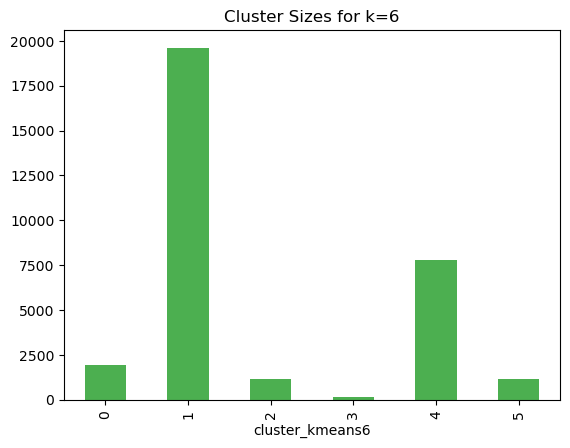


Mean values for k=6:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18.601442,75.971164,57.369722,0.0,0.408342,0.550463,1.104016,0.894954,0.675592,0.508239,0.446447,0.291967,0.348610,0.411946,0.321318,0.195675,0.154995,0.135427,0.105561,0.066426,0.048919,0.033471,0.022142,0.017508,0.019567,0.046859,0.082904,1.006179,1.042739,1.046344,1.057158,0.969619,0.999485,0.951596,4.588054,1.859938,0.276519,0.166838
1,36.637221,55.482975,18.845754,0.0,0.027985,0.033643,0.066622,0.059996,0.047966,0.041034,0.040065,0.064991,0.115047,0.150525,0.166939,0.131563,0.103833,0.101437,0.120960,0.146447,0.152156,0.130900,0.094760,0.060251,0.032878,0.023805,0.023499,0.240035,0.242889,0.248343,0.260730,0.316342,0.325364,0.334642,0.317311,0.834336,0.645224,0.140432
2,8.125754,82.838932,74.713178,0.0,0.043928,0.028424,0.017227,0.017227,0.018949,0.035314,0.071490,0.171404,0.353144,0.543497,0.679587,0.685616,0.653747,0.691645,1.347976,2.093885,2.518519,2.228252,1.565891,0.692506,0.274763,0.173988,0.099053,1.892334,1.964686,2.084410,2.250646,2.342808,2.127476,2.405685,0.232558,3.778639,9.754522,1.240310
3,2.649425,86.591954,83.942529,0.0,0.155172,0.091954,0.068966,0.028736,0.034483,0.252874,0.632184,2.109195,2.735632,4.005747,4.747126,3.793103,2.517241,2.137931,2.442529,2.902299,3.827586,3.356322,2.890805,1.913793,0.666667,0.327586,0.333333,6.028736,6.189655,6.114943,6.011494,6.143678,5.563218,6.120690,1.264368,22.045977,15.419540,3.241379
4,16.509191,75.146806,58.637614,0.0,0.027896,0.019540,0.024039,0.021854,0.024810,0.027124,0.047178,0.133565,0.267001,0.390667,0.490551,0.441059,0.352487,0.318807,0.452629,0.598535,0.637871,0.533359,0.382826,0.227279,0.121609,0.074174,0.065047,0.691606,0.692120,0.750482,0.804731,0.922484,0.882504,0.981874,0.192441,2.394138,2.605219,0.488109
5,8.396014,81.953206,73.557192,0.0,0.063258,0.070191,0.084922,0.107452,0.113518,0.113518,0.199307,0.651646,1.350953,2.054593,2.349220,1.866551,1.078856,0.821490,0.629116,0.647314,0.707106,0.673310,0.540728,0.367418,0.175910,0.122184,0.119584,2.083189,2.200173,2.233969,2.273830,2.187175,1.867418,2.171577,0.752166,10.173310,3.197574,0.785095


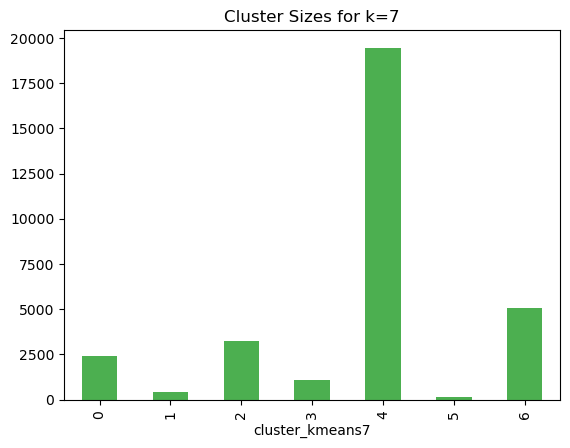


Mean values for k=7:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.870017,78.382890,65.512874,0.0,0.039037,0.043189,0.046512,0.069352,0.066030,0.068522,0.115449,0.384967,0.884136,1.306063,1.519103,1.141196,0.715532,0.510797,0.321844,0.325997,0.325166,0.316445,0.260797,0.178156,0.092193,0.057724,0.059385,1.235050,1.350498,1.329734,1.326827,1.300249,1.125831,1.253322,0.448090,6.461794,1.550249,0.387458
1,9.515766,82.135135,72.619369,0.0,0.725225,1.078829,1.871622,1.621622,1.099099,0.945946,0.900901,0.666667,0.889640,1.117117,0.781532,0.484234,0.346847,0.344595,0.227477,0.171171,0.139640,0.078829,0.049550,0.036036,0.027027,0.153153,0.195946,2.011261,2.087838,2.135135,2.171171,2.081081,1.867117,1.934685,8.243243,4.630631,0.666667,0.412162
2,24.771375,69.462206,44.690830,0.0,0.244734,0.303903,0.657993,0.522305,0.434944,0.316914,0.278191,0.156134,0.178129,0.235440,0.180607,0.121128,0.102540,0.084263,0.065056,0.044919,0.028501,0.021995,0.012392,0.012701,0.020756,0.026642,0.057311,0.608116,0.570012,0.600682,0.590768,0.587980,0.631970,0.626704,2.758984,1.058240,0.172862,0.117410
3,6.356682,83.728111,77.371429,0.0,0.052535,0.030415,0.012903,0.016590,0.026728,0.047926,0.107834,0.376959,0.717051,1.059908,1.408295,1.362212,1.028571,0.991705,1.423963,1.914286,2.382488,2.302304,1.635023,0.804608,0.340092,0.199078,0.130876,2.373272,2.413825,2.582488,2.780645,2.741935,2.563134,2.990783,0.294931,6.944700,9.658065,1.474654
4,35.865155,56.152581,20.287425,0.0,0.017016,0.017633,0.032439,0.031616,0.025190,0.023905,0.026835,0.068271,0.127339,0.170111,0.198746,0.164559,0.130938,0.124203,0.135462,0.153352,0.161834,0.143636,0.108729,0.072795,0.039687,0.028635,0.025704,0.247789,0.248818,0.260230,0.276424,0.330454,0.338885,0.356364,0.174635,0.984166,0.703013,0.166821
5,2.913580,86.740741,83.827160,0.0,0.148148,0.092593,0.074074,0.024691,0.018519,0.160494,0.567901,2.246914,2.944444,4.320988,5.018519,4.123457,2.537037,2.098765,2.370370,2.734568,3.629630,3.117284,2.882716,1.870370,0.666667,0.351852,0.376543,6.197531,6.370370,6.086420,6.092593,6.376543,5.549383,5.907407,1.086420,23.290123,14.734568,3.265432
6,16.376708,75.216875,58.840166,0.0,0.018221,0.011091,0.008715,0.004753,0.006338,0.013468,0.026936,0.073480,0.123787,0.184393,0.246782,0.257675,0.245593,0.271143,0.626857,0.957021,1.027926,0.805110,0.550406,0.290553,0.142008,0.081600,0.063577,0.686076,0.705288,0.765498,0.844524,1.027728,0.976431,1.065756,0.089523,1.402852,3.967320,0.577738


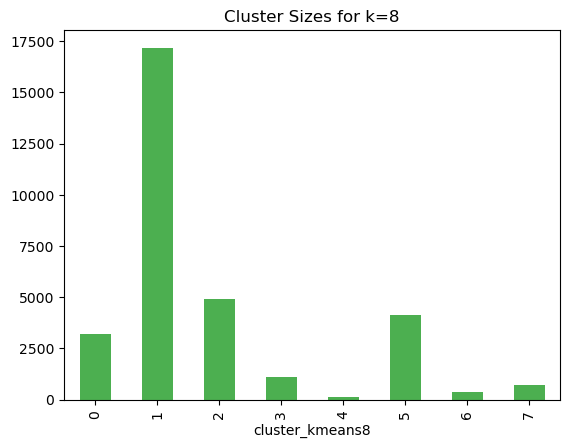


Mean values for k=8:


,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
cluster_kmeans8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24.826222,69.463407,44.637185,0.0,0.252569,0.314544,0.668016,0.537839,0.439738,0.322952,0.285892,0.158829,0.184678,0.235441,0.187481,0.116163,0.099346,0.080660,0.066334,0.046403,0.029897,0.023357,0.012769,0.013080,0.020243,0.024914,0.055123,0.613516,0.586422,0.607910,0.607599,0.596076,0.642790,0.635628,2.821551,1.062597,0.178761,0.113360
1,37.663271,54.187751,16.524480,0.0,0.016999,0.017174,0.031612,0.030622,0.024160,0.022355,0.023927,0.051930,0.088665,0.111719,0.129825,0.107295,0.095709,0.101065,0.146184,0.177854,0.185946,0.160040,0.117424,0.073645,0.039588,0.028003,0.024451,0.210980,0.218432,0.222216,0.243349,0.303021,0.317227,0.320254,0.166851,0.686208,0.787448,0.165687
2,19.022524,73.327922,54.305398,0.0,0.023742,0.021713,0.036120,0.039570,0.038758,0.040990,0.057224,0.214083,0.454545,0.662541,0.779018,0.642045,0.439326,0.343547,0.189935,0.160106,0.154221,0.173498,0.143263,0.116274,0.065138,0.045455,0.045860,0.656250,0.653206,0.697037,0.691153,0.742289,0.710024,0.783482,0.258117,3.535106,0.821023,0.272727
3,8.398917,82.120036,73.721119,0.0,0.054152,0.047834,0.050542,0.082130,0.084838,0.088448,0.171480,0.603791,1.297834,1.915162,2.280686,1.897112,1.115523,0.843863,0.654332,0.685921,0.777076,0.707581,0.601986,0.439531,0.194946,0.128159,0.130866,2.045126,2.160650,2.204874,2.298736,2.214801,1.881769,2.154332,0.579422,9.953971,3.426895,0.893502
4,2.776316,86.947368,84.171053,0.0,0.157895,0.092105,0.065789,0.026316,0.019737,0.171053,0.572368,2.328947,2.901316,4.309211,5.072368,4.085526,2.565789,2.171053,2.473684,2.796053,3.802632,3.263158,3.026316,1.993421,0.703947,0.361842,0.381579,6.322368,6.447368,6.236842,6.190789,6.506579,5.684211,6.164474,1.105263,23.434211,15.361842,3.440789
5,15.558681,75.931135,60.372454,0.0,0.019399,0.012609,0.009457,0.004122,0.007759,0.014549,0.031280,0.069835,0.124879,0.203201,0.268914,0.256062,0.245150,0.277158,0.679195,1.059166,1.152522,0.896217,0.615907,0.312803,0.156402,0.090689,0.066925,0.759942,0.782250,0.841659,0.940107,1.106935,1.023521,1.152037,0.099176,1.445199,4.403007,0.626819
6,9.403553,82.038071,72.634518,0.0,0.756345,1.159898,2.000000,1.682741,1.131980,0.972081,0.906091,0.642132,0.850254,1.002538,0.728426,0.441624,0.309645,0.324873,0.225888,0.177665,0.137056,0.078680,0.050761,0.038071,0.025381,0.152284,0.182741,2.020305,2.159898,2.172589,2.157360,2.035533,1.852792,1.911168,8.609137,4.299492,0.670051,0.398477
7,6.652589,83.824251,77.171662,0.0,0.038147,0.031335,0.012262,0.014986,0.016349,0.039510,0.094005,0.242507,0.505450,0.737057,0.920981,0.911444,0.865123,0.861035,1.585831,2.350136,2.931880,2.784741,1.871935,0.776567,0.303815,0.162125,0.088556,2.326975,2.405995,2.564033,2.668937,2.712534,2.547684,2.975477,0.246594,5.043597,11.524523,1.331063


In [17]:
for k in possible_k:
    
    scaled_data_copy = scaled_data.copy()
    
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_data_copy)  
    clusters  = kmeans.predict(scaled_data_copy)  
    
    temp_data[f'cluster_kmeans{k}'] = clusters 
    
    temp_data.groupby([f'cluster_kmeans{k}']).size().plot(kind='bar', 
                                                          color='#4CAF50') 
    plt.title(f'Cluster Sizes for k={k}')
    plt.show()
    
    cluster_means = temp_data.groupby([f'cluster_kmeans{k}']).mean().T

    print(f"\nMean values for k={k}:")
    display(cluster_means.T)
    
    temp_data.drop(f'cluster_kmeans{k}', axis = 1, inplace = True)

**Silhouette Score**

For n_clusters = 2, the average silhouette_score is: 0.5577


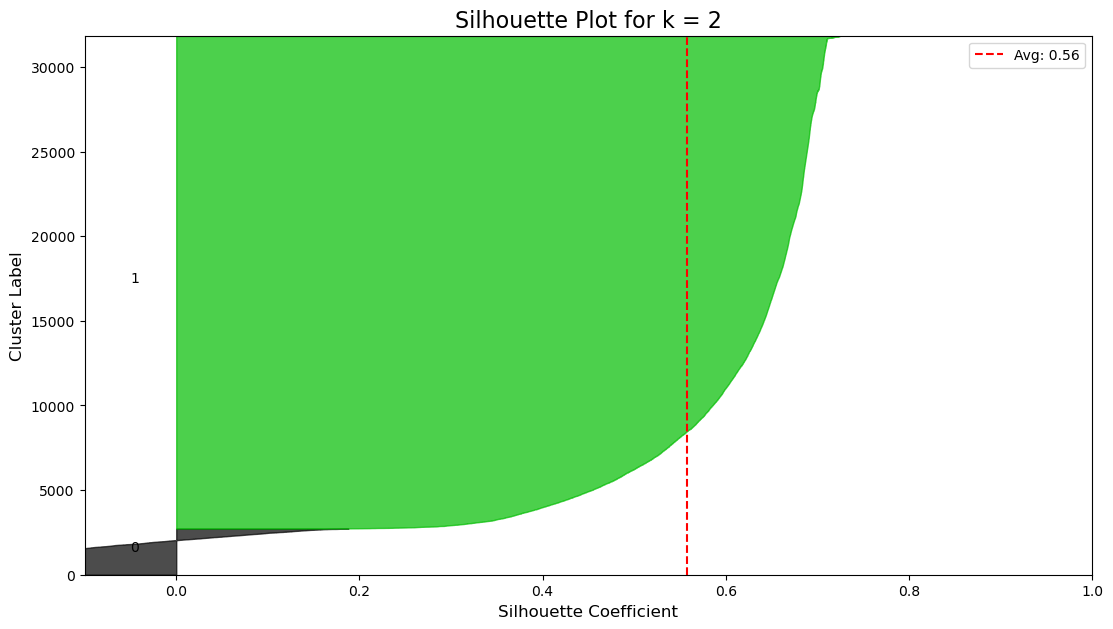

For n_clusters = 3, the average silhouette_score is: 0.3622


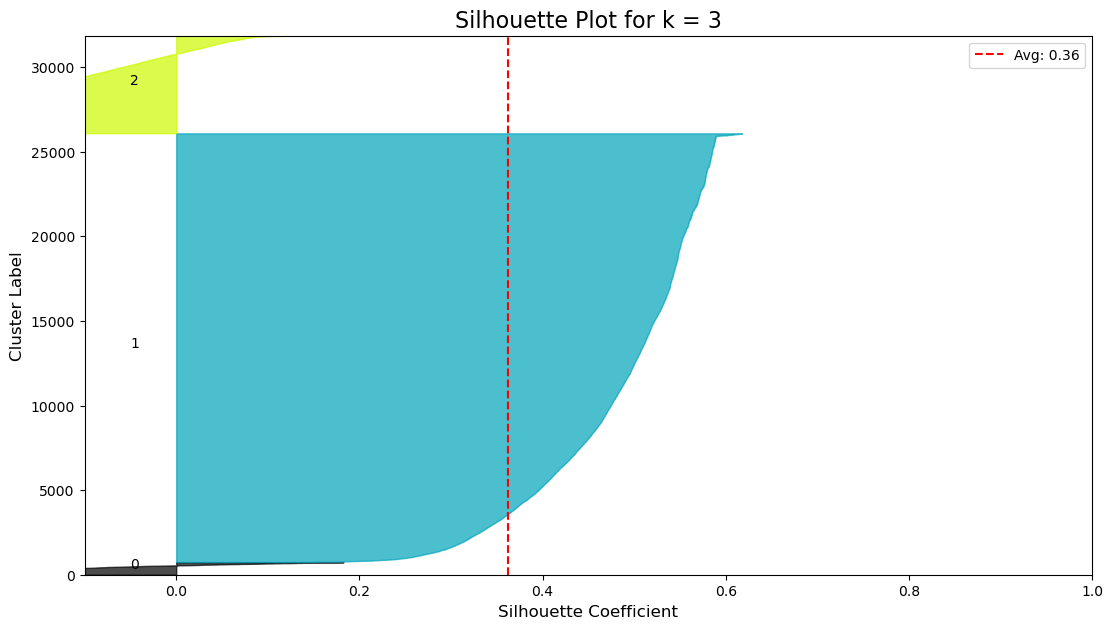

For n_clusters = 4, the average silhouette_score is: 0.3366


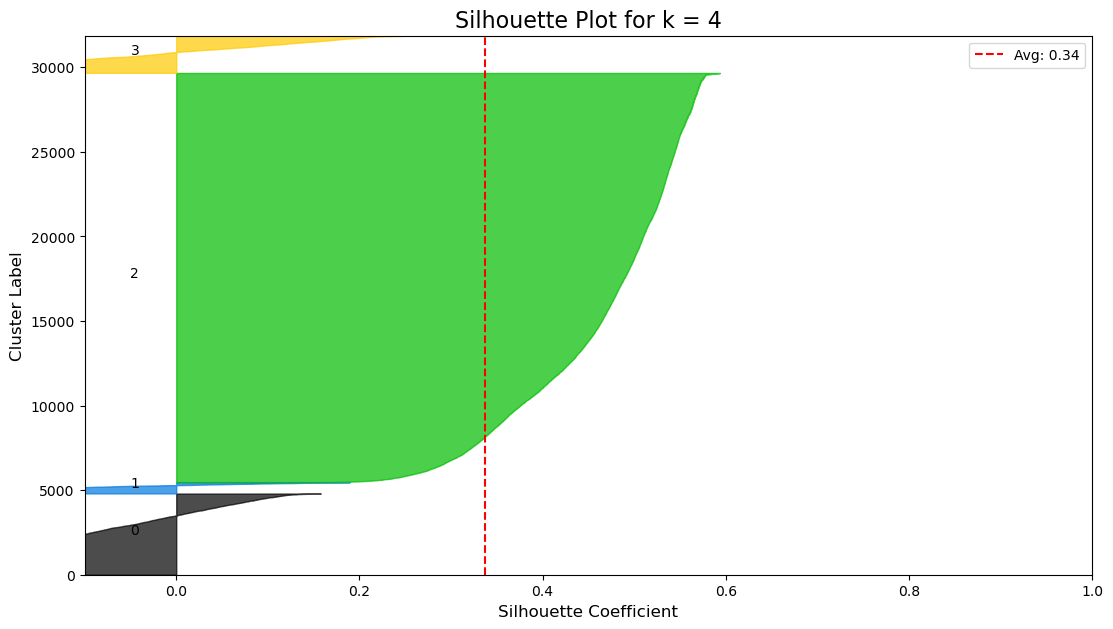

For n_clusters = 5, the average silhouette_score is: 0.2358


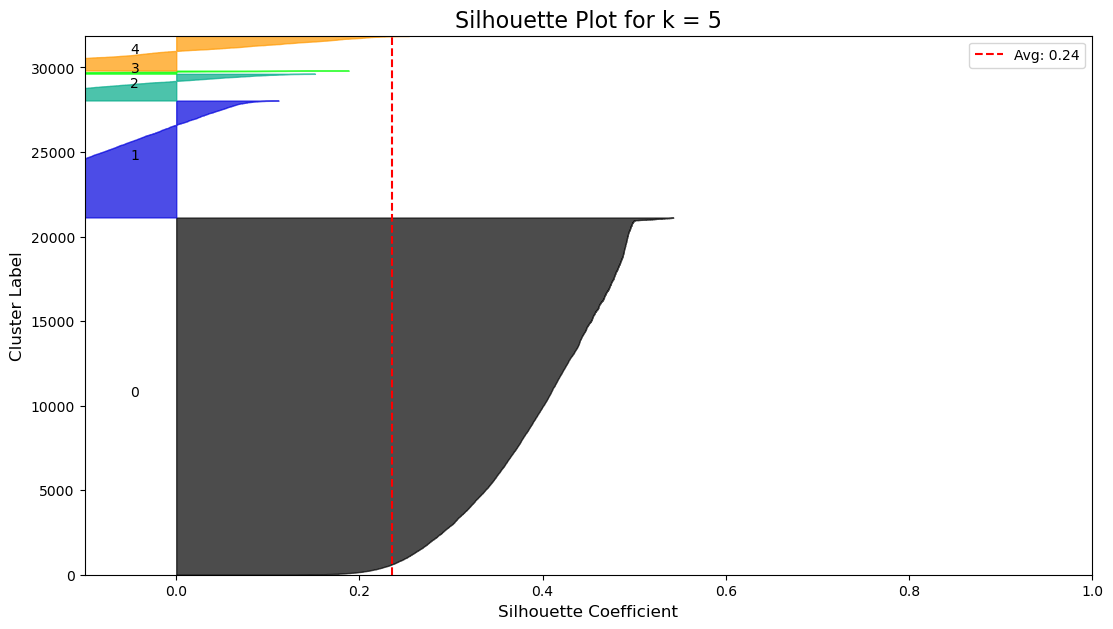

For n_clusters = 6, the average silhouette_score is: 0.1940


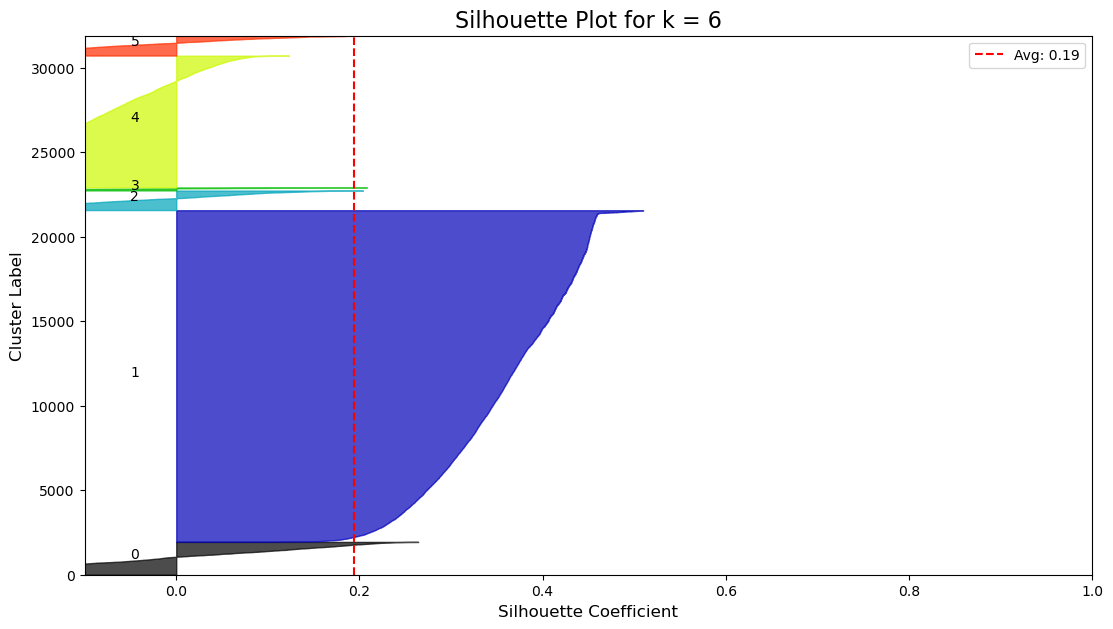

For n_clusters = 7, the average silhouette_score is: 0.1797


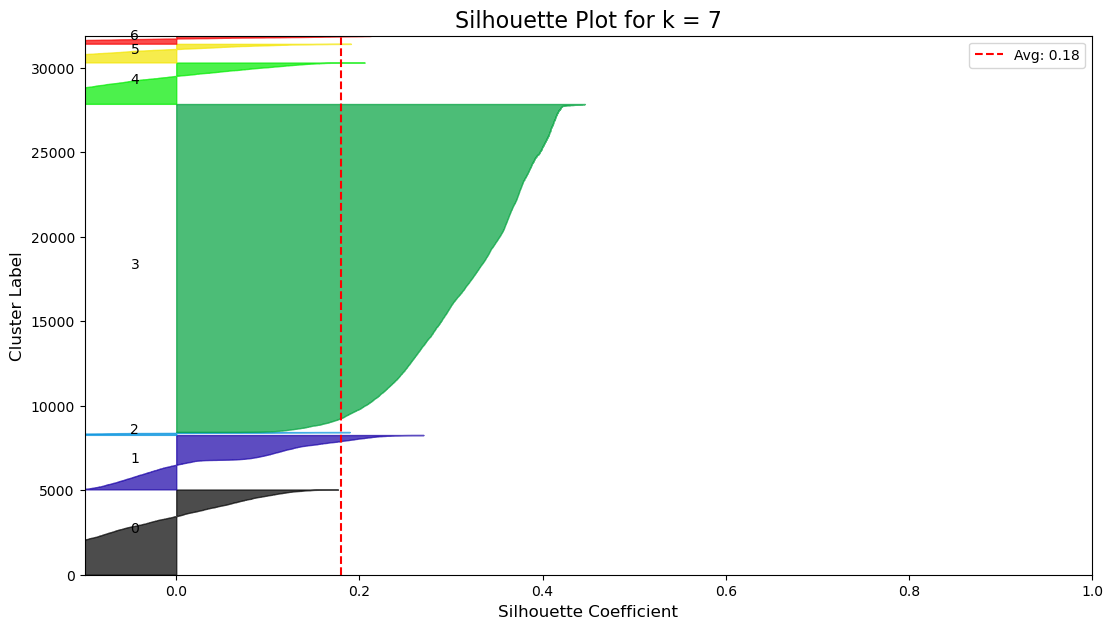

For n_clusters = 8, the average silhouette_score is: 0.1526


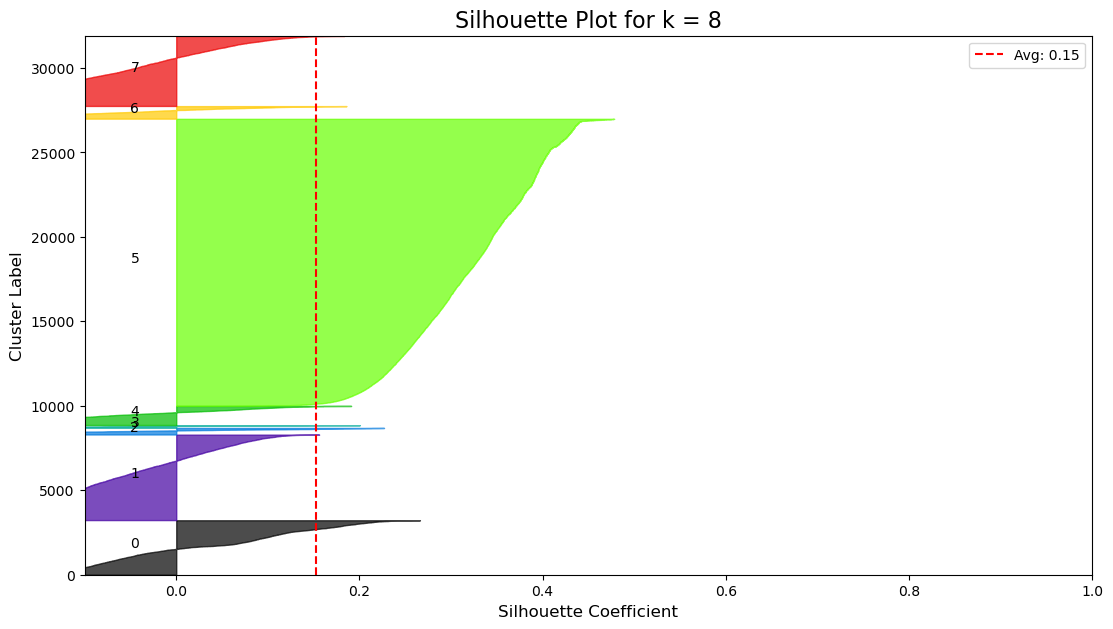

In [19]:
avg_silhouette = f.plot_silhouette(scaled_data, possible_k)

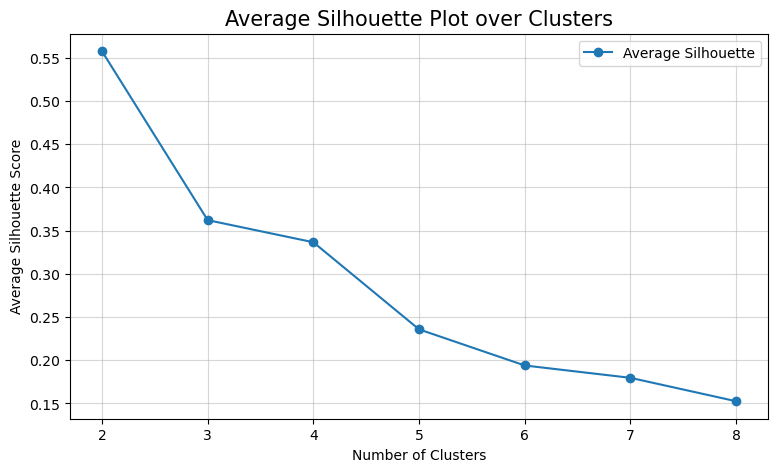

In [20]:
plt.figure(figsize=(9, 5))
plt.plot(possible_k, avg_silhouette, marker='o', label='Average Silhouette')
plt.ylabel("Average Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title("Average Silhouette Plot over Clusters", fontsize=15)
plt.xticks(possible_k)
plt.grid(alpha=0.5)
plt.legend()
plt.show()


**Final Solution for K-Means**

In [14]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, 
                 init='k-means++', 
                 n_init=15, 
                 random_state=1)

km_labels = kmclust.fit_predict(temp_data)
km_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

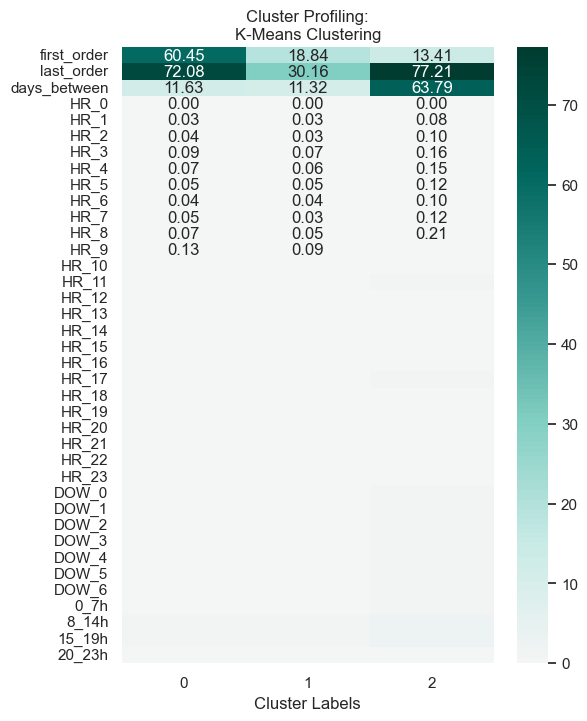

In [50]:
f.plot_cluster_profiling(temp_data, km_labels, "K-Means")

## 2.3 Density-based Clustering

In [7]:
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from hdbscan import HDBSCAN
from sklearn.neighbors import NearestNeighbors

### 2.3.1 Meanshift

In [26]:
bandwidth = estimate_bandwidth(scaled_data)#, 
                               #quantile=0.5, 
                               #random_state=1, 
                               #n_jobs=-1)
bandwidth

4.6813956067698435

In [27]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
temp_data['meanshift'] = ms.fit_predict(scaled_data)

temp_data['meanshift'].nunique()

137

In [89]:
#plot_cluster_counts(temp_data, 'dbscan_cluster_1')

In [ ]:
# ms_results = []

# # Define clustering settings
# cluster_settings = [
#     {"model_type": "meanshift", "eps": k}
#     for k in range(5, 15)  
# ]
# # Loop over settings and evaluate models
# for settings in cluster_settings:
#     result = create_and_evaluate_model2(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
#     ms_results.append(result)

# # Convert results to DataFrame
# ms_results_df = pd.DataFrame(ms_results)
# ms_results_df

### 2.3.1 DBScan

**Optimimising *Eps* Parameter**

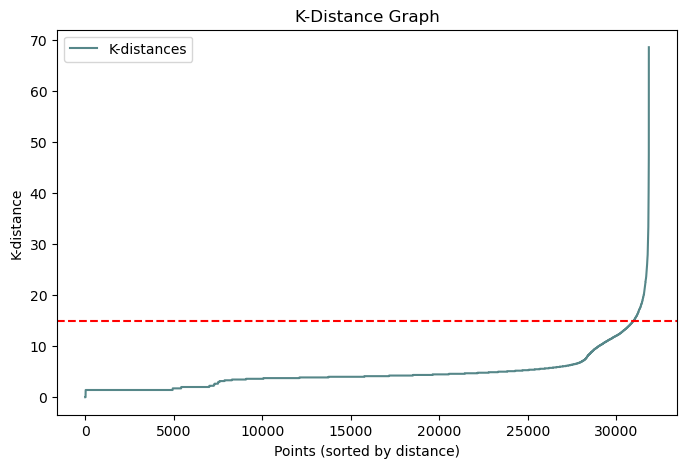

In [35]:
# K-distance graph to find the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(temp_data)
distances, _ = neigh.kneighbors(temp_data)
distances = np.sort(distances[:, -1])  

# Plot the distances
plt.figure(figsize=(8, 5))
plt.plot(distances, label="K-distances", color = "#568789")
plt.axhline(y=15, color='red', linestyle='--')
plt.xlabel("Points (sorted by distance)")
plt.ylabel("K-distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Clustering**

In [34]:
dbscan = DBSCAN(eps=15)  
temp_data['dbscan'] = dbscan.fit_predict(scaled_data)
temp_data['dbscan'].value_counts()

dbscan
 0    31792
-1       36
Name: count, dtype: int64

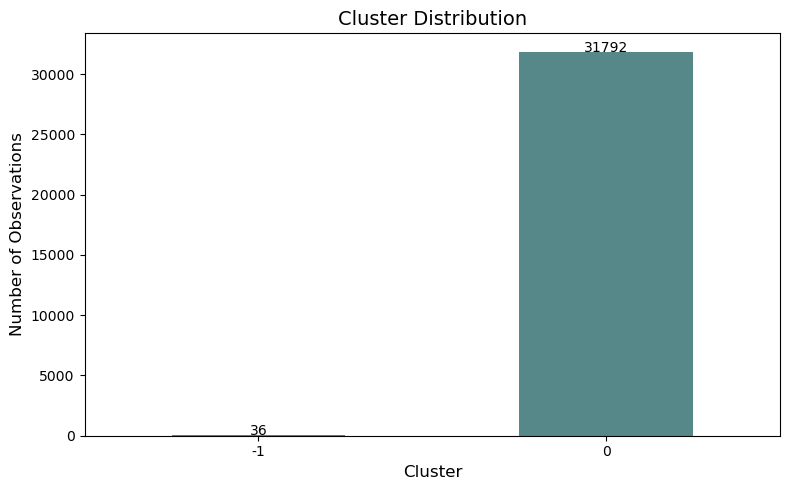

In [28]:
plot_cluster_counts(temp_data, 'dbscan_cluster_1')

In [63]:
db_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "dbscan", "eps": k, "algorithm": 'ball_tree'}
    for k in range(5, 15)  
] + [
    {"model_type": "dbscan", "eps": k, "algorithm": 'kd_tree'}
    for k in range(5, 15)  
] + [
    {"model_type": "dbscan", "eps": k, "algorithm": 'brute'}
    for k in range(5, 15)  
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = create_and_evaluate_model2(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    db_results.append(result)

# Convert results to DataFrame
db_results_df = pd.DataFrame(db_results)
db_results_df

,Model,eps,algorithm,R2,Silhouette,Calinski-Harabasz
0,dbscan,5,ball_tree,0.166132,0.644663,6340.732346
1,dbscan,6,ball_tree,0.145727,0.696555,5429.049879
2,dbscan,7,ball_tree,0.125800,0.734912,4579.856858
3,dbscan,8,ball_tree,0.112499,0.764191,4034.254533
4,dbscan,9,ball_tree,0.100199,0.784397,3544.053274
5,dbscan,10,ball_tree,0.084522,0.802586,2938.362907
6,dbscan,11,ball_tree,0.076076,0.815965,2620.558134
7,dbscan,12,ball_tree,0.066859,0.826826,2280.325182
8,dbscan,13,ball_tree,0.059243,0.838771,2004.197416
9,dbscan,14,ball_tree,0.053238,0.847494,1789.634699


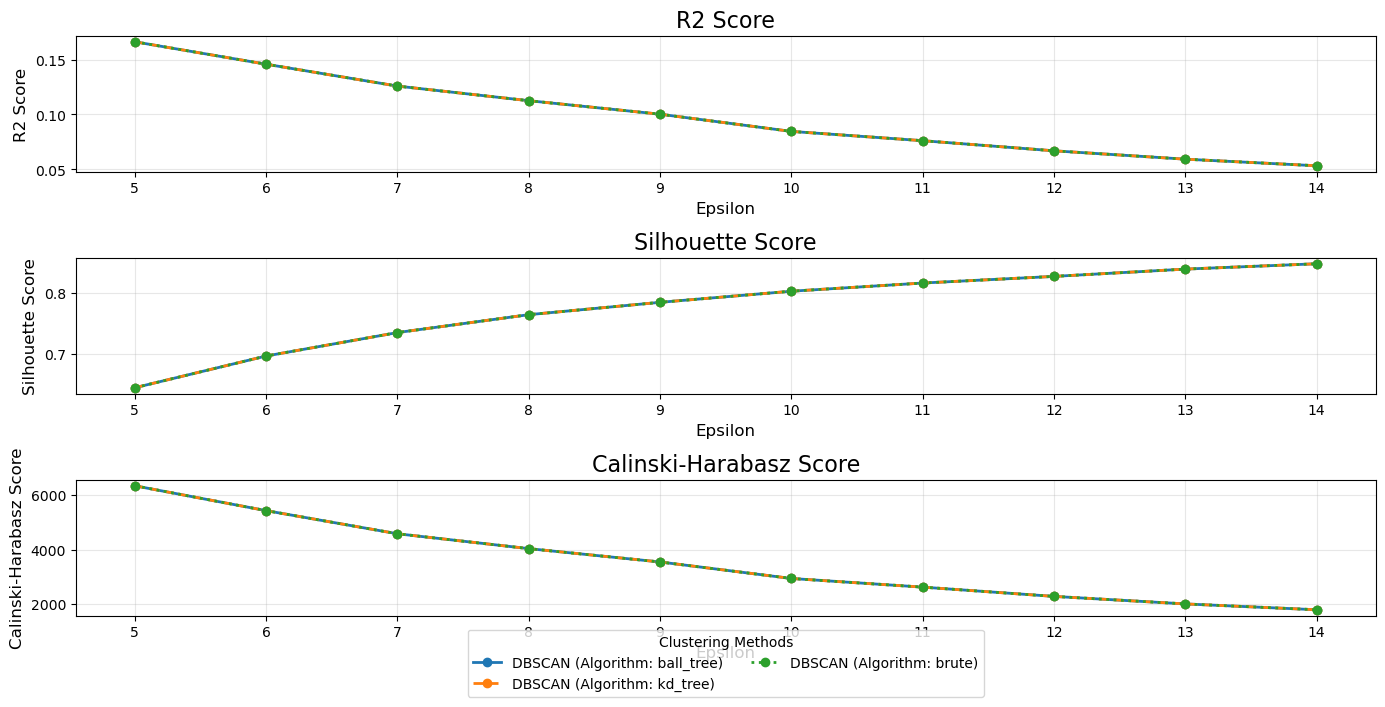

<Figure size 640x480 with 0 Axes>

In [96]:
plot_evaluation_scores(db_results_df, path+'DBScan_scores')

### 2.3.1 HDB Scan

In [44]:
hdbscan = HDBSCAN(min_cluster_size = 70, 
                  cluster_selection_method = 'leaf')
temp_data['hdbscan_cluster'] = hdbscan.fit_predict(scaled_data)

In [45]:
temp_data['hdbscan_cluster'].value_counts()

hdbscan_cluster
-1      24480
 1         42
 75        24
 488       24
 310       24
        ...  
 614        5
 8          5
 583        5
 332        5
 517        5
Name: count, Length: 773, dtype: int64

In [28]:
hdb_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'leaf'}
    for k in range(5, 75, 10)  
] + [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'eom'}
    for k in range(5, 75, 10)  
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = create_and_evaluate_model2(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hdb_results.append(result)

# Convert results to DataFrame
hdb_results_df = pd.DataFrame(hdb_results)
hdb_results_df

,Model,min_cluster_size,cluster_selection_method,R2,Silhouette,Calinski-Harabasz
0,hdbscan,5,leaf,0.076205,-0.220863,3.318368
1,hdbscan,15,leaf,0.053806,-0.274422,10.054081
2,hdbscan,25,leaf,0.041743,-0.297174,14.705591
3,hdbscan,35,leaf,0.023994,-0.328487,19.536192
4,hdbscan,45,leaf,0.016550,-0.324734,25.487983
5,hdbscan,55,leaf,0.009682,-0.333011,23.926442
6,hdbscan,65,leaf,0.007774,-0.329301,27.700043
7,hdbscan,5,eom,0.077603,-0.222176,3.708592
8,hdbscan,15,eom,0.057083,-0.272964,13.508342
9,hdbscan,25,eom,0.043209,-0.293862,17.921176


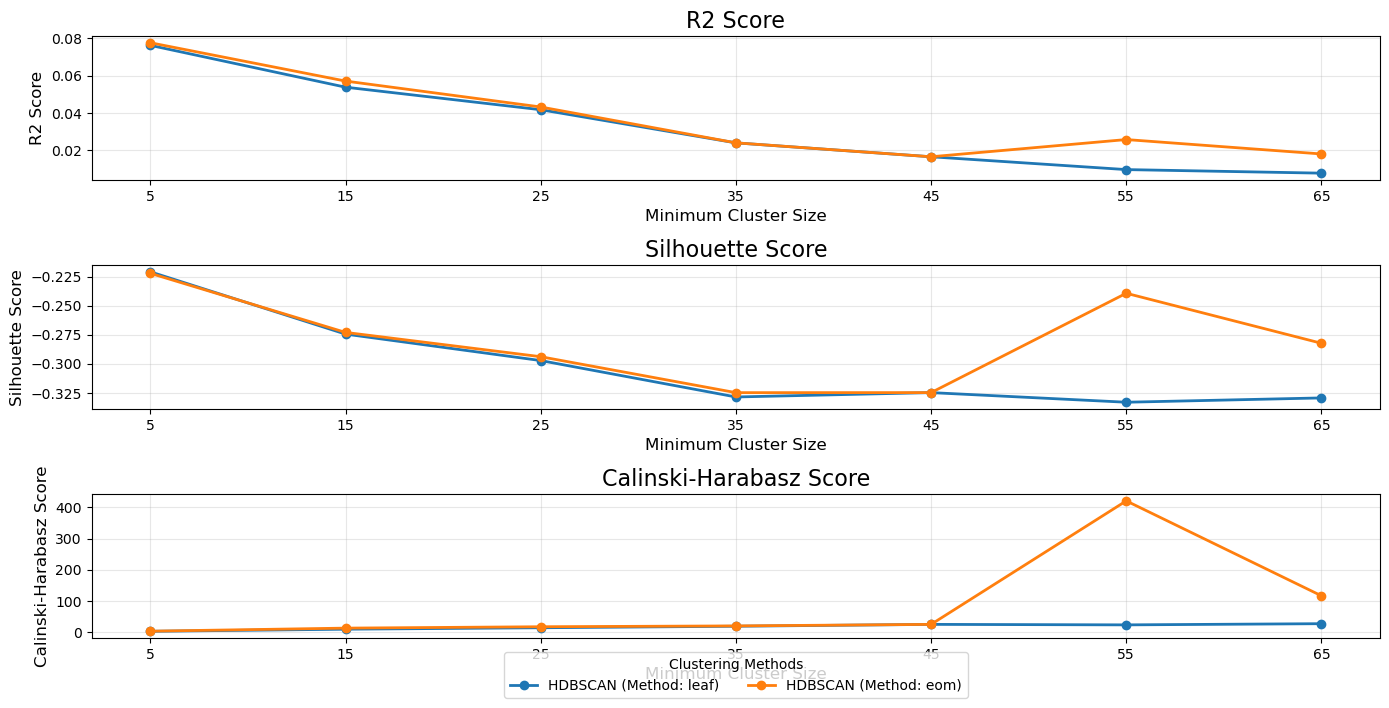

<Figure size 640x480 with 0 Axes>

In [95]:
plot_evaluation_scores(hdb_results_df, path+'HDBScan_scores')

## 2.? UMAP

In [21]:
import umap.umap_ as umap

In [32]:
umap_object = umap.UMAP(n_neighbors=10, min_dist=0.1)

In [33]:
num_ordered = temp_data.sort_index()
umap_embedding = umap_object.fit_transform(num_ordered)

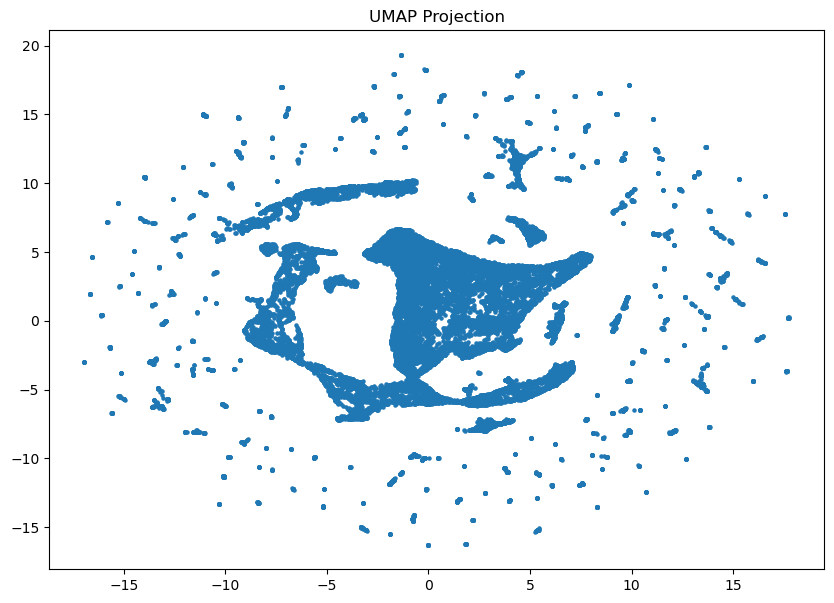

In [34]:
f.plot_dim_reduction(umap_embedding)